<a href="https://colab.research.google.com/github/voshna123/tensorflow_practice/blob/main/Multiclass_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

## Loading in fashion MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

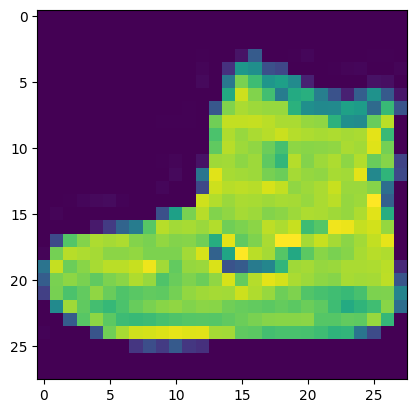

In [4]:
plt.imshow(X_train[0])

## Create class names lsit

In [5]:
class_names =["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

##Plotting ranodm images from the data

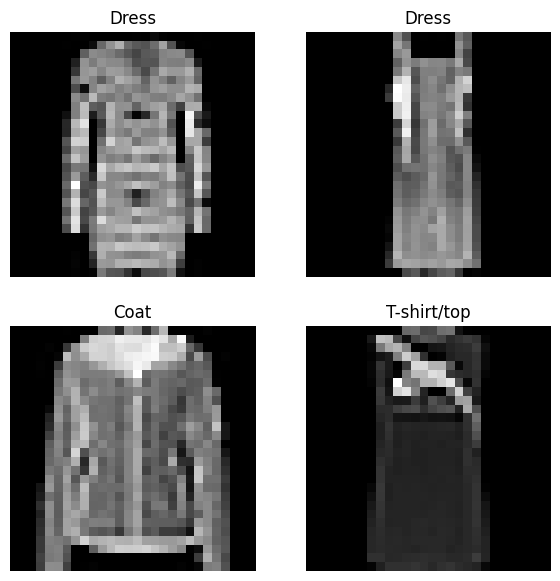

In [6]:
import random

plt.figure(figsize=(7,7))

for i in range(4):
  random_index = random.randint(0,len(X_train)-1)
  plt.subplot(2,2,i+1)
  plt.imshow(X_train[random_index],cmap="gray")
  plt.title(class_names[y_train[random_index]])
  plt.axis("off")
plt.show()

## Creating model

* Using sparsecategoricalcrossentropy
* img shape = 28x28
* output shape = 10
* normalizing data is super important

In [7]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

hist = model1.fit(X_train,y_train,epochs=10, validation_data = (X_test,y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1181 - loss: 2.9934 - val_accuracy: 0.2189 - val_loss: 1.8944
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2526 - loss: 1.7474 - val_accuracy: 0.2951 - val_loss: 1.6025
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3216 - loss: 1.5833 - val_accuracy: 0.3309 - val_loss: 1.5445
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3528 - loss: 1.5171 - val_accuracy: 0.4100 - val_loss: 1.3984
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4352 - loss: 1.3449 - val_accuracy: 0.4530 - val_loss: 1.2625
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.4528 - loss: 1.2691 - val_accuracy: 0.4582 - val_loss: 1.2460
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4555 - loss: 1.2533 - val_accuracy: 0.4580 - val_loss: 1.2381
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4567 - loss: 1.2485 - 

In [8]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,212 (94.58 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,142 (63.06 KB)

In [9]:
results_dict ={"model":[],
               "loss":[],
               "acc":[]}

In [10]:
## gettting results
results = model1.evaluate(X_test,y_test)
results_dict["model"].append("without normalised")
results_dict["loss"].append(results[0])
results_dict["acc"].append(results[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4474 - loss: 1.2416


### Normalizing our data

In [11]:
train_data_scaled = X_train/255.0
test_data_scaled = X_test/255.0

## testing model with normalized data

In [12]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

hist2 = model2.fit(train_data_scaled,y_train,epochs=10, validation_data = (test_data_scaled,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5943 - loss: 1.1212 - val_accuracy: 0.7994 - val_loss: 0.5762
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8103 - loss: 0.5382 - val_accuracy: 0.8167 - val_loss: 0.5267
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8289 - loss: 0.4906 - val_accuracy: 0.8250 - val_loss: 0.5040
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8375 - loss: 0.4655 - val_accuracy: 0.8284 - val_loss: 0.4936
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8420 - loss: 0.4508 - val_accuracy: 0.8323 - val_loss: 0.4847
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8452 - loss: 0.4408 - val_accuracy: 0.8345 - val_loss: 0.4783
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8484 - loss: 0.4332 - val_accuracy: 0.8371 - val_loss: 0.4730
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8508 - loss: 0.4268 - 

In [13]:
results = model2.evaluate(test_data_scaled,y_test)
results_dict["model"].append("normalised")
results_dict["loss"].append(results[0])
results_dict["acc"].append(results[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8409 - loss: 0.4559


In [14]:
results_df = pd.DataFrame(results_dict)
results_df

,model,loss,acc
0,without normalised,1.230951,0.4576
1,normalised,0.461667,0.8387


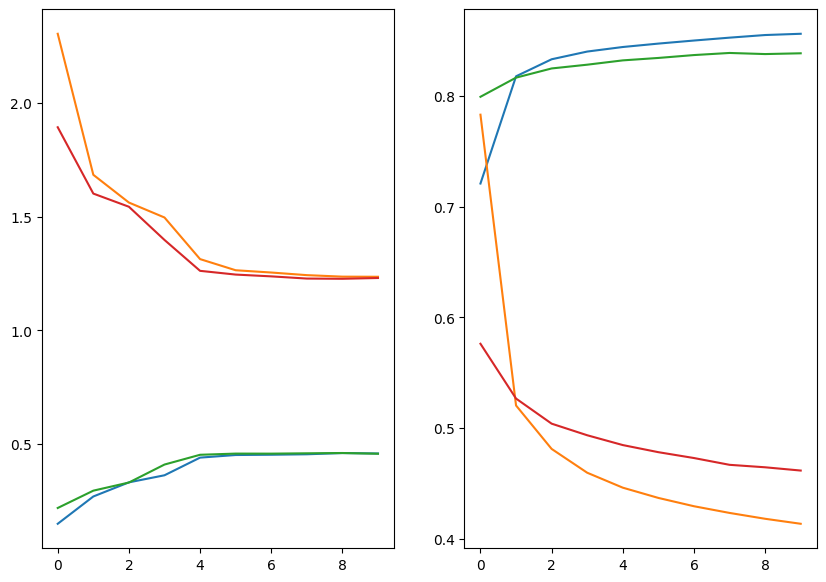

In [15]:
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.plot(pd.DataFrame(hist.history))

plt.subplot(1,2,2)
plt.plot(pd.DataFrame(hist2.history))
plt.show()

## Testing with learning rate

In [16]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

hist3 = model3.fit(train_data_scaled,y_train,epochs=10, validation_data = (test_data_scaled,y_test), callbacks=[lr_scheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6507 - loss: 0.9583 - val_accuracy: 0.8242 - val_loss: 0.5111 - learning_rate: 0.0010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8338 - loss: 0.4793 - val_accuracy: 0.8374 - val_loss: 0.4673 - learning_rate: 0.0011
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8468 - loss: 0.4401 - val_accuracy: 0.8410 - val_loss: 0.4585 - learning_rate: 0.0013
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8521 - loss: 0.4220 - val_accuracy: 0.8418 - val_loss: 0.4474 - learning_rate: 0.0014
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8550 - loss: 0.4109 - val_accuracy: 0.8436 - val_loss: 0.4385 - learning_rate: 0.0016
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8564 - loss: 0.4037 - val_accuracy: 0.8418 - val_loss: 0.4388 - learning_rate: 0.0018
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8574 - l

## Plotting loss vs lr

In [17]:
df = pd.DataFrame(hist3.history)
df

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.755500,0.680113,0.8242,0.511066,0.001000
1,0.838000,0.465517,0.8374,0.467268,0.001122
2,0.848167,0.434222,0.8410,0.458484,0.001259
3,0.852800,0.418299,0.8418,0.447357,0.001413
4,0.855883,0.408578,0.8436,0.438475,0.001585
5,0.856667,0.402109,0.8418,0.438849,0.001778
6,0.857950,0.397940,0.8414,0.436609,0.001995
7,0.859000,0.396138,0.8430,0.432619,0.002239
8,0.859167,0.393845,0.8403,0.440118,0.002512
9,0.858983,0.393888,0.8424,0.438769,0.002818


In [18]:
df_imp = df.loc[:,["loss", "learning_rate"]]
df_imp

,loss,learning_rate
0,0.680113,0.001000
1,0.465517,0.001122
2,0.434222,0.001259
3,0.418299,0.001413
4,0.408578,0.001585
5,0.402109,0.001778
6,0.397940,0.001995
7,0.396138,0.002239
8,0.393845,0.002512
9,0.393888,0.002818


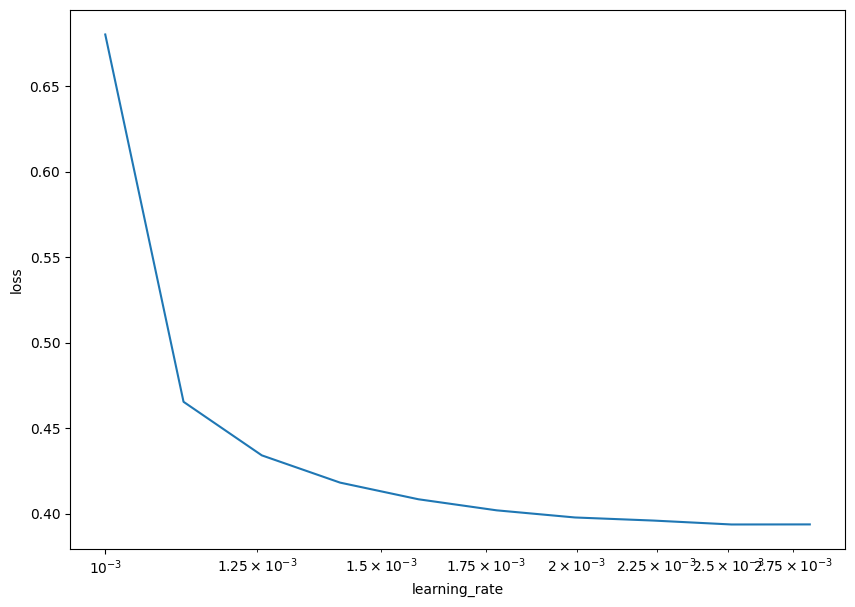

In [19]:
plt.figure(figsize=(10,7))
plt.semilogx(df_imp["learning_rate"],df_imp["loss"])
plt.xlabel("learning_rate")
plt.ylabel("loss")
plt.show()

In [20]:
0.9*10**-3

0.0009000000000000001

## Tesing with new lr

In [21]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(10,activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(10,activation="softmax")
    ])

model4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.9*10**-3),
               metrics = ['accuracy'])


hist4 = model4.fit(train_data_scaled,y_train, epochs=10, validation_data = (test_data_scaled,y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6293 - loss: 1.0541 - val_accuracy: 0.8192 - val_loss: 0.5174
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8278 - loss: 0.4932 - val_accuracy: 0.8242 - val_loss: 0.4831
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8383 - loss: 0.4567 - val_accuracy: 0.8327 - val_loss: 0.4648
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8454 - loss: 0.4362 - val_accuracy: 0.8344 - val_loss: 0.4550
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8488 - loss: 0.4226 - val_accuracy: 0.8363 - val_loss: 0.4487
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8527 - loss: 0.4115 - val_accuracy: 0.8387 - val_loss: 0.4436
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8559 - loss: 0.4025 - val_accuracy: 0.8398 - val_loss: 0.4391
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8574 - loss: 0.3952 - 

In [22]:
results = model4.evaluate(test_data_scaled,y_test)
results_dict["model"].append("normalised with best lr(aprrox)")
results_dict["loss"].append(results[0])
results_dict["acc"].append(results[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8478 - loss: 0.4181


In [23]:
pd.DataFrame(results_dict)

,model,loss,acc
0,without normalised,1.230951,0.4576
1,normalised,0.461667,0.8387
2,normalised with best lr(aprrox),0.428115,0.8437


## Creating confusion matrix of model 3

In [24]:
preds = tf.math.argmax(model4.predict(test_data_scaled), axis = -1)
preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

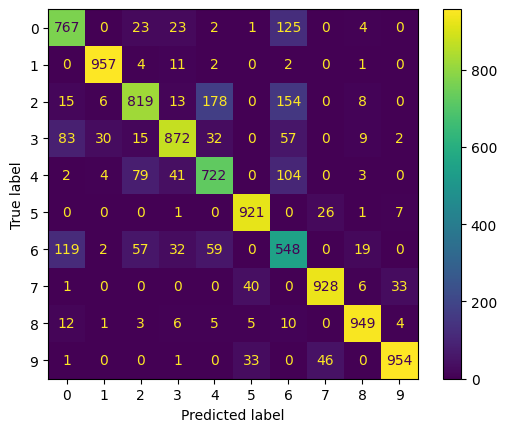

In [25]:
conf = sklearn.metrics.confusion_matrix(preds, y_test)
sklearn.metrics.ConfusionMatrixDisplay(conf).plot()

## Visualising predictions

Text(0.5, 1.0, 'Predcition:5, Actual:5')

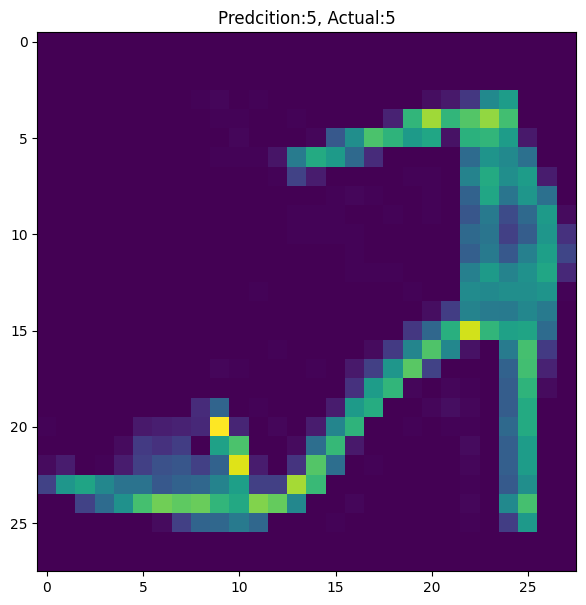

In [29]:
plt.figure(figsize=(10,7))
rand = random.randint(0,199)
plt.imshow(test_data_scaled[rand])
plt.title(f"Predcition:{preds[rand]}, Actual:{y_test[rand]}")